
# Comparison of Sample and Underlying Distribution:

It's important to understand the distinction between samples and the underlying distribution they are drawn from. While samples provide us with observed data points, they are not the same as the distribution itself. However, people often talk about samples as if they represent the entire distribution due to the intuitive connection between the two.

Let's explore this concept further and demonstrate it using Python.

Consider the following example:

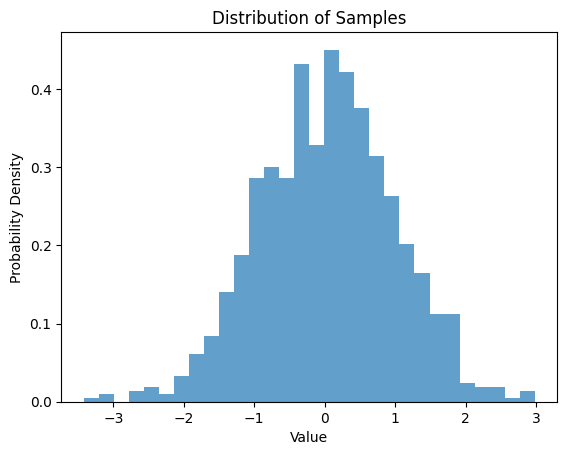

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random sample from a distribution
samples = np.random.normal(loc=0, scale=1, size=1000)

# Plot a histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.7)

# Customize the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Distribution of Samples')

# Display the plot
plt.show()


In this code, we generate a random sample of size 1000 from a normal distribution using np.random.normal(). We then plot a histogram of the samples using plt.hist(), which shows the distribution of values in the sample.

Now, let's discuss the intuition behind the distinction between samples and the underlying distribution:

**Samples**: The generated sample represents a finite set of observed values. In our example, the samples variable contains 1000 randomly generated values from the normal distribution. These values are observable data points.

**Underlying Distribution**: The underlying distribution represents the theoretical probability distribution that the samples are drawn from. In our example, the underlying distribution is the normal distribution with a mean of 0 and a standard deviation of 1.

The histogram plot visually represents the distribution of the samples. However, it's important to remember that the histogram is an estimate or approximation of the underlying distribution based on the observed data points. It provides insights into the shape, central tendency, and spread of the observed values, but it does not capture the exact characteristics of the underlying distribution.

#Important Remark

The reason people sometimes refer to samples as if they were the distribution is due to the close connection between the two. When the sample size is large and representative of the underlying distribution, the histogram can provide a useful approximation of the distribution. However, it's important to keep in mind that the sample is a subset of the entire distribution and may not capture all its nuances.

To better illustrate this point, we can compare the histogram of the sample to the actual probability density function (PDF) of the underlying distribution. Here's an example code snippet:

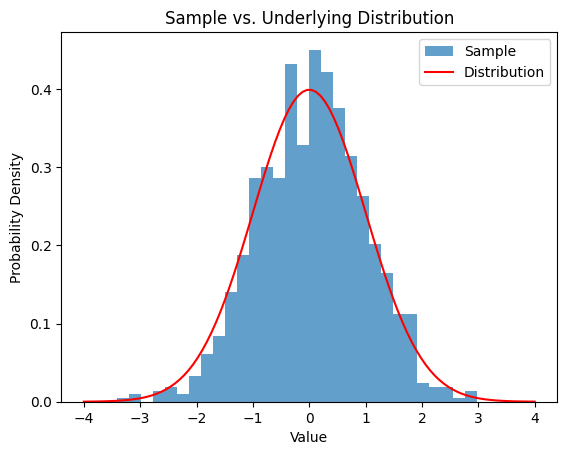

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set the mean and standard deviation of the distribution
mu = 0
sigma = 1

# Generate x values
x = np.linspace(-4, 4, 100)

# Compute the PDF for the distribution
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Plot the histogram of the sample
plt.hist(samples, bins=30, density=True, alpha=0.7, label='Sample')

# Plot the PDF of the underlying distribution
plt.plot(x, pdf, 'r-', label='Distribution')

# Customize the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Sample vs. Underlying Distribution')
plt.legend()

# Display the plot
plt.show()


# Uniform Distribution:
The uniform distribution generates random numbers between a specified range with equal probability. In Python, you can use the random module to generate random numbers. To generate random variables from a uniform distribution, you can use the random.uniform() function.

Here's an example that generates 1000 random numbers between 0 and 1 from a uniform distribution and plots a histogram to visualize the distribution:

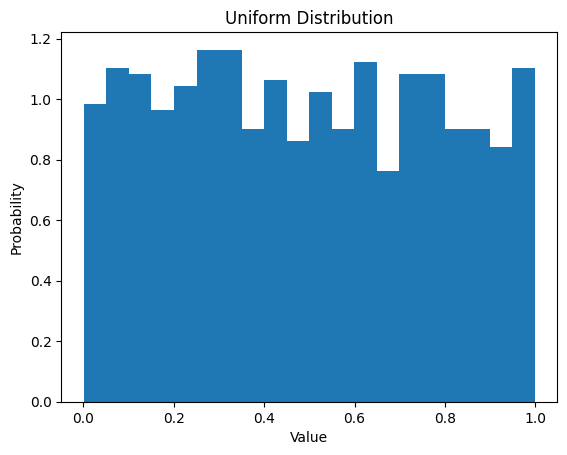

In [1]:
import random
import matplotlib.pyplot as plt

# Generate 1000 random numbers from a uniform distribution between 0 and 1
uniform_data = [random.uniform(0, 1) for _ in range(1000)]

# Plot a histogram of the generated data
plt.hist(uniform_data, bins=20, density=True)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Uniform Distribution')
plt.show()


# How exactly do we obtain these samples ? The Linear Congruential Generator



https://en.wikipedia.org/wiki/Linear_congruential_generator

The Linear Congruential Generator (LCG) is based on a simple linear recurrence relation and provides a basic method for generating pseudo-random numbers. The intuition behind the LCG algorithm is to iteratively generate a sequence of numbers that appear random but are deterministic given a specific set of parameters.

The LCG algorithm works by updating the current state (previous generated number) to obtain the next number in the sequence. This update is performed using a linear combination of the current state, a multiplier, an increment, and taking the modulus of the result with a large prime number (the modulus). The modulus operation restricts the generated numbers to a specific range.

The key intuition behind the LCG algorithm lies in the choice of the multiplier, increment, and modulus values. These values significantly affect the properties of the generated sequence.



To generate random numbers between 0 and 1 using the LCG algorithm, the following steps are typically taken:

1- Choose initial values: Select a seed value X0 as the starting point of the sequence.

2- Specify the constants: Choose appropriate values for the constants a, c, and m. These values should satisfy certain conditions to ensure good statistical properties of the generated random numbers.

3- Generate random numbers: Apply the LCG formula iteratively to generate a sequence of random numbers. Each number in the sequence is obtained by taking the modulus m of the result to ensure it falls within the desired range (e.g., 0 to 1).

It's important to note that while LCG is a straightforward and widely used algorithm, it has some limitations, including potential periodicity in the generated sequence and statistical properties that may not meet more rigorous requirements for randomness. Therefore, for scientific or cryptographic purposes, alternative algorithms such as Mersenne Twister or cryptographic secure random number generators are typically employed.

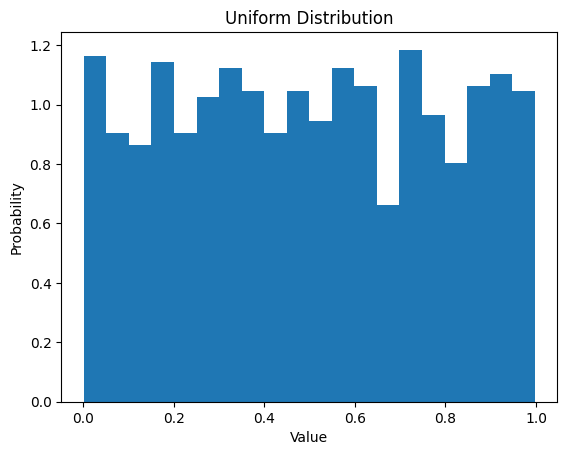

In [10]:
def lcg_uniform(seed, n):
    # Constants for the LCG algorithm
    m: int = 2_147_483_648
    a: int = 594_156_893
    c: int = 0

    # Initialize the seed
    x = seed

    # Generate the random numbers
    random_numbers = []
    for _ in range(n):
        x = (a * x + c) % m
        random_numbers.append(x / m)  # Normalize the generated value to be between 0 and 1

    return random_numbers


# Usage example
seed_value = 123  # Seed value for the LCG algorithm
num_samples = 1000  # Number of random numbers to generate

# Generate random numbers from the uniform distribution
random_values = lcg_uniform(seed_value, num_samples)

# Print the generated random numbers



# Plot a histogram of the generated data
plt.hist(random_values, bins=20, density=True)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Uniform Distribution')
plt.show()


# Gaussian (Normal) Distribution:
The Gaussian distribution, also known as the normal distribution, is a continuous probability distribution characterized by its mean and standard deviation. Python provides the random.gauss() function from the random module to generate random numbers from a Gaussian distribution.

Here's an example that generates 1000 random numbers from a Gaussian distribution with a mean of 0 and a standard deviation of 1, and plots a histogram to visualize the distribution:

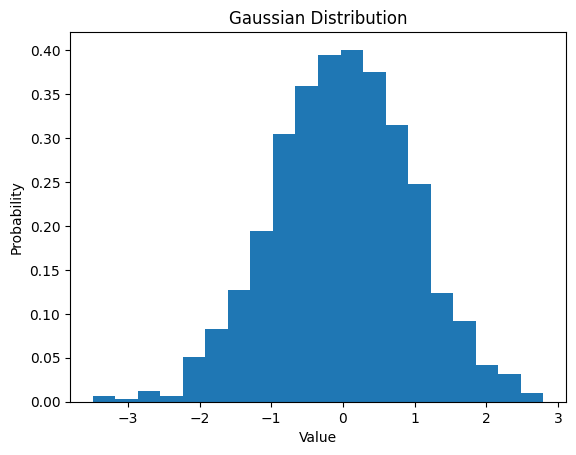

In [2]:
import random
import matplotlib.pyplot as plt

# Generate 1000 random numbers from a Gaussian distribution with mean 0 and standard deviation 1
gaussian_data = [random.gauss(0, 1) for _ in range(1000)]

# Plot a histogram of the generated data
plt.hist(gaussian_data, bins=20, density=True)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Gaussian Distribution')
plt.show()

# How do we sample from normal ? The Box-Muller Transform

https://en.wikipedia.org/wiki/Box%E2%80%**93Muller_transform**

Box-Muller Transform:
The Box-Muller transform is another method for generating random numbers from a normal distribution. It uses the property that if U1 and U2 are independent random variables uniformly distributed between 0 and 1, then Z1 and Z2 obtained from the equations Z1 = sqrt(-2 * log(U1)) * cos(2 * pi * U2) and Z2 = sqrt(-2 * log(U1)) * sin(2 * pi * U2) are independent random variables following a standard normal distribution.

Here's an algorithm for sampling from a normal distribution using the Box-Muller transform:

Generate two random numbers u1 and u2 from a uniform distribution between 0 and 1.
Compute z1 and z2 using the Box-Muller equations.
Scale z1 and z2 by the desired standard deviation and add the desired mean to obtain samples from the normal distribution.
Here's an example code snippet that demonstrates sampling from a normal distribution using the Box-Muller transform:


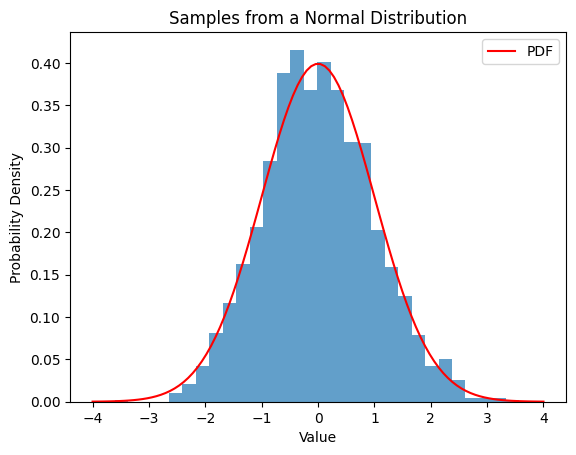

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set the mean and standard deviation of the normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Number of samples to generate
num_samples = 1000

# Generate random samples from the normal distribution using the Box-Muller transform
u1 = np.random.rand(num_samples)
u2 = np.random.rand(num_samples)
z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
samples = mu + sigma * np.concatenate((z1, z2))

# Plot the histogram of the generated samples
plt.hist(samples, bins=30, density=True, alpha=0.7)

# Plot the PDF of the normal distribution for comparison
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
plt.plot(x, pdf, 'r-', label='PDF')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Samples from a Normal Distribution')
plt.legend()
plt.show()


# Multinomial Distribution:
The multinomial distribution is a generalization of the binomial distribution to more than two outcomes. It models the probability of observing each of multiple mutually exclusive outcomes in a single trial. In Python, you can use the numpy library to generate random numbers from a multinomial distribution.

Here's an example that generates 1000 random numbers from a multinomial distribution with three outcomes (categories) and corresponding probabilities, and plots a bar chart to visualize the distribution:

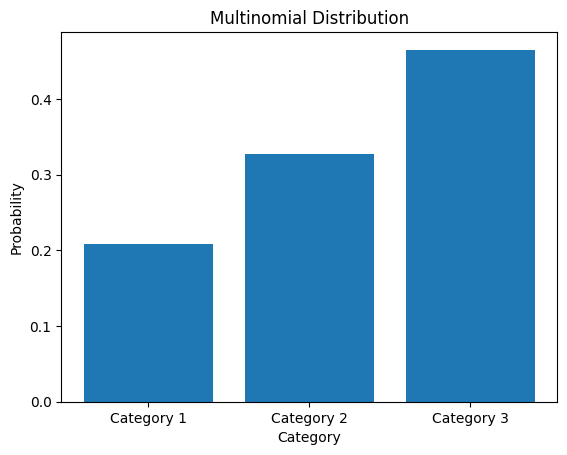

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probabilities for each category
probabilities = [0.2, 0.3, 0.5]

# Generate 1000 random numbers from a multinomial distribution
multinomial_data = np.random.multinomial(1000, probabilities)

# Plot a bar chart of the generated data
categories = ['Category 1', 'Category 2', 'Category 3']
plt.bar(categories, multinomial_data / np.sum(multinomial_data))
plt.xlabel('Category')
plt.ylabel('Probability')
plt.title('Multinomial Distribution')
plt.show()


# How do we sample from multinomial ? Inverse_transform_sampling


https://en.wikipedia.org/wiki/Inverse_transform_sampling

Suppose that we want to sample from distribution with a known CDF $F_X$.

1- Generate random numbers: Generate a set of random numbers, one for each trial, from a uniform distribution between 0 and 1.

2- Find the generalized inverse of the desired CDF $F^{-1}_X$.

3- Compute $X^{\prime}(u) = F^{-1}_X(u)$ wher $u$ is the unifrm sampled from 0 and 1 computed in step 1.

 The random variable $X^{\prime}(u)$ has the distribtion of X.

In [15]:
import random

def sample_from_multinomial(num_trials, probabilities):
    # Generate random numbers for each trial
    random_numbers = [random.random() for _ in range(num_trials)]

    # Normalize probabilities
    sum_probabilities = sum(probabilities)
    normalized_probabilities = [p / sum_probabilities for p in probabilities]

    # Sample from the multinomial distribution
    samples = [0] * len(probabilities)
    cumulative_prob = 0

    for i, p in enumerate(normalized_probabilities[:-1]):
        cumulative_prob += p
        samples[i] = sum(random_number > cumulative_prob for random_number in random_numbers)

    samples[-1] = num_trials - sum(samples)

    return samples


In this implementation:

We generate random numbers in the range [0, 1) for each trial using random.random().

We normalize the probabilities by dividing each probability by the sum of all probabilities.

We iterate through the normalized probabilities and compare them with the cumulative probability to determine the number of occurrences for each outcome. The number of occurrences is determined by comparing the random number with the cumulative probability.

The last outcome's count is obtained by subtracting the sum of all previous counts from the total number of trials.

Running this code will produce a sample from the Multinomial distribution with the specified number of trials and probabilities.

# High Dimensional Distribution




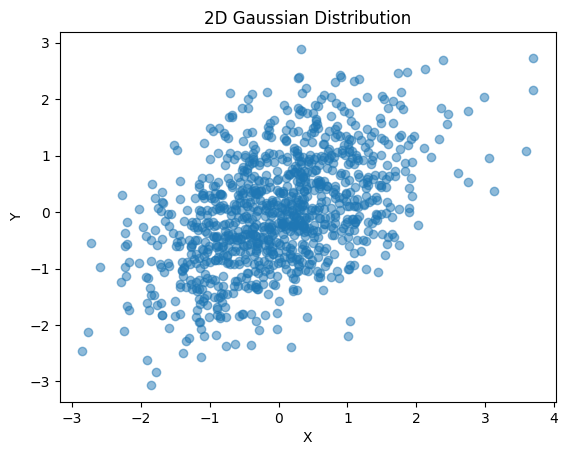

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set the mean and covariance matrix for the Gaussian distribution
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

# Generate 1000 random samples from the 2D Gaussian distribution
x, y = np.random.multivariate_normal(mean, cov, 1000).T

# Plot the scatter plot
plt.scatter(x, y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Distribution')
plt.show()


# Mixure of Gaussian

A mixture of Gaussians is a probabilistic model that combines multiple Gaussian distributions to represent complex data distributions. It assumes that the observed data is generated from a combination of underlying Gaussian components, each characterized by its own mean and covariance. The mixture model assigns a weight to each Gaussian component, indicating the probability of selecting that component to generate a given data point. By adjusting the parameters of the mixture model, it can capture different patterns and structures in the data, including clusters, modes, or different subpopulations. Mixture of Gaussians has applications in various fields, including computer vision, pattern recognition, and data clustering, where it provides a flexible framework to model and analyze complex data distributions with underlying Gaussian components.






<ipython-input-5-9a6a0daa3344>:25: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, pdfs[0], colors='blue', linestyles='dashed', alpha=0.5, label='Original Gaussian 1')
<ipython-input-5-9a6a0daa3344>:26: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, pdfs[1], colors='red', linestyles='dashed', alpha=0.5, label='Original Gaussian 2')


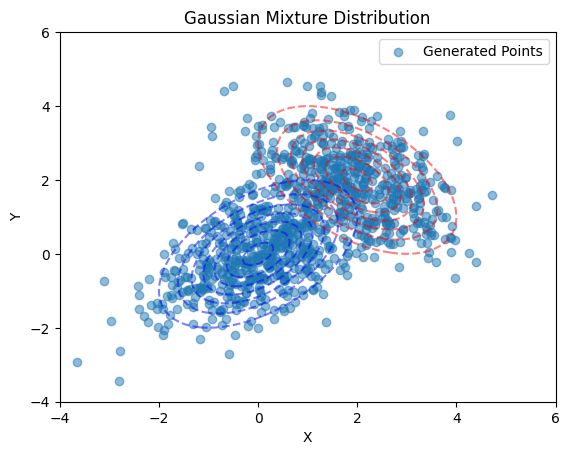

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Set the parameters for the Gaussian mixture distribution
means = [[0, 0], [2, 2]]
covs = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]
weights = [0.6, 0.4]

# Generate 1000 random samples from the Gaussian mixture distribution
component_idx = np.random.choice(len(means), size=1000, p=weights)
samples = np.array([np.random.multivariate_normal(means[i], covs[i]) for i in component_idx])

# Create a grid of points to evaluate the PDFs
x, y = np.meshgrid(np.linspace(-4, 6, 100), np.linspace(-4, 6, 100))
grid = np.dstack((x, y))

# Compute the PDF for each Gaussian component
pdfs = [multivariate_normal.pdf(grid, mean=means[i], cov=covs[i]) for i in range(len(means))]

# Plot the scatter plot
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, label='Generated Points')

# Plot the contours of the original Gaussian distributions
plt.contour(x, y, pdfs[0], colors='blue', linestyles='dashed', alpha=0.5, label='Original Gaussian 1')
plt.contour(x, y, pdfs[1], colors='red', linestyles='dashed', alpha=0.5, label='Original Gaussian 2')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Mixture Distribution')
plt.legend()
plt.show()


# Sampling from Mixture of Gaussian

This is an algorithm to sample from mixture of Gaussian

1 Define the parameters of the mixture model: This includes the number of Gaussian components, their means, covariances, and the weights assigned to each component.

2 Randomly select a component: Use the weights assigned to each component to randomly choose one Gaussian component from the mixture. You can use the np.random.choice() function with the specified weights.

3 Generate a sample from the selected component: Once you have selected a component, use the mean and covariance of that component to generate a random sample. You can use np.random.multivariate_normal() function from the NumPy library to generate a sample from a Gaussian distribution.

Repeat steps 2 and 3 to generate desired number of samples: Iterate the selection and sampling process to generate the desired number of samples from the mixture.

In [6]:
import numpy as np

# Define the parameters of the mixture model
means = [[1, 1], [4, 4], [-2, -2]]
covs = [[[1, 0], [0, 1]], [[2, 0], [0, 2]], [[0.5, 0], [0, 0.5]]]
weights = [0.4, 0.3, 0.3]
num_samples = 1000

# Generate samples from the mixture model
samples = []
for _ in range(num_samples):
    # Randomly select a component
    component_idx = np.random.choice(len(means), p=weights)

    # Generate a sample from the selected component
    sample = np.random.multivariate_normal(means[component_idx], covs[component_idx])

    # Add the sample to the list
    samples.append(sample)

# Convert the samples to a NumPy array
samples = np.array(samples)

# More complicated cases?

What if we do not know the underlying distributution?

https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#sphx-glr-auto-examples-neighbors-plot-digits-kde-sampling-py

best bandwidth: 3.79269019073225


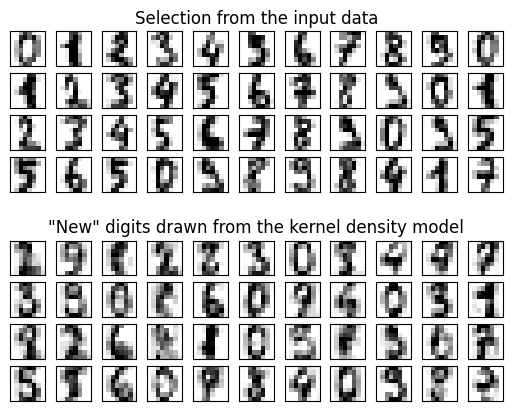

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# load the data
digits = load_digits()

# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(
            real_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(
            new_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)

ax[0, 5].set_title("Selection from the input data")
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

ok, general random variable generation solved?